In [32]:
# importing all required packages & notebook extensions at the start of the notebook
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt
%matplotlib inline

or_dir = '../data' #original data (demux sequences, metadata)
data_dir = 'data' #data from polybox (ASV, taxonomy analysis)


In [6]:
! wget -nv -O data.zip 'https://polybox.ethz.ch/index.php/s/pNA39R0rl2xMMj9/download'
! unzip -q data.zip #-d $data_dir
! mv data data2
! mv data2/taxonomy/data .
! cp data2/ASV/data/* data
! cp data2/Phylogeny/data/* data
! rm -r data2
! rm data.zip

2022-10-26 08:48:52 URL:https://polybox.ethz.ch/index.php/s/pNA39R0rl2xMMj9/download [903126257] -> "data.zip" [1]


In [7]:
! pwd

/home/jovyan/HelicopterBaby/Phylogeny, alpha and beta diversity


Q: should we use filtered table or not???

In [14]:
! qiime feature-table summarize \
  --i-table $data_dir/phylogeny_filtered_table.qza \
  --m-sample-metadata-file $or_dir/metadata.tsv \
  --o-visualization $data_dir/feature-table.qzv

Saved Visualization to: data/feature-table.qzv


In [12]:
Visualization.load(f'{data_dir}/feature-table.qzv')

<visualization: Visualization uuid: ea4a5b3d-ce51-467a-b22c-a70aa14138f1>

In [12]:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/phylogeny_filtered_table.qza \
    --i-phylogeny $data_dir/reference-tree.qza \
    --p-max-depth 10000 \
    --m-metadata-file $or_dir/metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction.qzv

Saved Visualization to: data/alpha-rarefaction.qzv


DOES 10k max depth make sense????

In [3]:
Visualization.load(f'{data_dir}/alpha-rarefaction.qzv')

<visualization: Visualization uuid: e043bd7e-1459-4b96-a22d-fa9570c70065>

In [ ]:
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/phylogeny_filtered_table.qza \
  --i-phylogeny $data_dir/reference-tree.qza \
  --m-metadata-file $or_dir/metadata.tsv \
  --p-sampling-depth 8000 \
  --output-dir $data_dir/core-metrics-results

In [7]:
! pwd

/home/jovyan/HelicopterBaby/Phylogeny, alpha and beta diversity


In [ ]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $or_dir/metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance.qzv

In [ ]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance.qzv')

In [ ]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $or_dir/metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance-numeric.qzv

In [13]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: 72958585-15a2-42cd-a29c-4fc7adcd36b3>

# Weaning: alpha diversity before and after

In [54]:
metadata = pd.read_csv(or_dir + '/metadata.tsv', sep = '\t')
print(metadata.head())
print(metadata.shape)
id_weaning = metadata[metadata['diet_weaning'] == True]['id']
print(id_weaning.shape)
id_not_weaning = metadata[metadata['diet_weaning'] == False]['id']
print(id_not_weaning.shape)


unassigned_weaning = metadata['diet_weaning'].isna().sum()
print('Percentage of unassigned to weaning data = ' + str(unassigned_weaning/metadata.shape[0]*100))
print(unassigned_weaning)

           id Library Layout      Instrument      collection_date  \
0  ERR1314182         PAIRED  Illumina MiSeq  2011-11-11 00:00:00   
1  ERR1314183         PAIRED  Illumina MiSeq  2010-12-11 00:00:00   
2  ERR1314184         PAIRED  Illumina MiSeq  2011-12-11 00:00:00   
3  ERR1314185         PAIRED  Illumina MiSeq  2011-12-11 00:00:00   
4  ERR1314186         PAIRED  Illumina MiSeq  2013-01-12 00:00:00   

          geo_location_name  geo_latitude  geo_longitude  host_id  age_days  \
0  USA, Missouri, St. Louis      38.63699     -90.263794     42.1     232.0   
1  USA, Missouri, St. Louis      38.63699     -90.263794     27.2     192.0   
2  USA, Missouri, St. Louis      38.63699     -90.263794     28.1     536.0   
3  USA, Missouri, St. Louis      38.63699     -90.263794     28.2     537.0   
4  USA, Missouri, St. Louis      38.63699     -90.263794     39.2     688.0   

   weight_kg  ...  birth_length_cm     sex  delivery_mode     zygosity  \
0        NaN  ...             47.0  

In [67]:
alpha_diversities = pd.read_csv(data_dir + '/metadata_correlation.tsv', sep = '\t')
alpha_diversities = alpha_diversities.iloc[1:,:]
print(alpha_diversities.head())

           id geo_latitude geo_longitude host_id age_days weight_kg length_cm  \
1  ERR1314182     38.63699    -90.263794    42.1      232       NaN       NaN   
2  ERR1314183     38.63699    -90.263794    27.2      192       NaN       NaN   
3  ERR1314184     38.63699    -90.263794    28.1      536       NaN       NaN   
4  ERR1314185     38.63699    -90.263794    28.2      537       NaN       NaN   
5  ERR1314186     38.63699    -90.263794    39.2      688       NaN       NaN   

   WAZ  HAZ  WHZ  BMI birth_weight_g birth_length_cm age_months  \
1  NaN  NaN  NaN  NaN           2470              47          8   
2  NaN  NaN  NaN  NaN           2490              45          6   
3  NaN  NaN  NaN  NaN           3194              51         18   
4  NaN  NaN  NaN  NaN           3166              50         18   
5  NaN  NaN  NaN  NaN           2421              48         23   

           faith_pd  
1  27.7134617024975  
2  28.9246050942665  
3  36.6827759318082  
4  41.4487404536513  


In [68]:
alpha_weaning = alpha_diversities.loc[alpha_diversities['id'].isin(list(id_weaning))] #['faith_pd']
#print(alpha_weaning.head())
print(alpha_diversities['id'].isin(list(id_weaning)))
alpha_not_weaning = alpha_diversities.loc[alpha_diversities['id'].isin(list(id_not_weaning))] #['faith_pd']
#print(id_not_weaning.head())

1        True
2        True
3       False
4       False
5       False
        ...  
1664    False
1665     True
1666     True
1667    False
1668    False
Name: id, Length: 1668, dtype: bool


['ERR1314182',
 'ERR1314183',
 'ERR1314187',
 'ERR1314188',
 'ERR1314190',
 'ERR1314191',
 'ERR1314198',
 'ERR1314199',
 'ERR1314203',
 'ERR1314204',
 'ERR1314205',
 'ERR1314206',
 'ERR1314178',
 'ERR1314166',
 'ERR1314167',
 'ERR1314211',
 'ERR1314213',
 'ERR1314249',
 'ERR1314250',
 'ERR1314251',
 'ERR1314252',
 'ERR1314260',
 'ERR1314267',
 'ERR1314275',
 'ERR1314276',
 'ERR1314212',
 'ERR1314235',
 'ERR1314236',
 'ERR1314278',
 'ERR1314142',
 'ERR1314050',
 'ERR1314054',
 'ERR1314055',
 'ERR1314062',
 'ERR1314063',
 'ERR1314073',
 'ERR1314074',
 'ERR1314040',
 'ERR1314041',
 'ERR1314027',
 'ERR1314028',
 'ERR1314032',
 'ERR1314033',
 'ERR1314037',
 'ERR1314039',
 'ERR1314143',
 'ERR1314112',
 'ERR1314113',
 'ERR1314116',
 'ERR1314117',
 'ERR1314111',
 'ERR1314133',
 'ERR1314087',
 'ERR1314096',
 'ERR1314280',
 'ERR1314542',
 'ERR1314543',
 'ERR1314555',
 'ERR1314557',
 'ERR1314621',
 'ERR1314626',
 'ERR1314632',
 'ERR1314290',
 'ERR1314291',
 'ERR1314292',
 'ERR1314293',
 'ERR13142

In [70]:
alpha_diversities = alpha_diversities.iloc[1:,:]
print(alpha_diversities['id'].nunique())
colr_1 = alpha_diversities['id'].isin(list(id_weaning)).astype(int)
print(alpha_diversities['id'].isin(list(id_weaning))[0:5])
print(colr_1[0:5])
colr_2 = alpha_diversities['id'].isin(list(id_not_weaning)).astype(int)
colr_2[colr_2==1] =2
#print(alpha_diversities['id'].isin(list(id_not_weaning))[0:10])
#print(colr_2[0:10])
metadata_ordered = metadata.set_index('id')
metadata_ordered = metadata_ordered.loc[alpha_diversities['id'], ]
colr_3 = metadata_ordered['diet_weaning'].isna().astype(int)
colr_3[colr_3==1] =3
colr_3['ind'] = colr_1.index
colr_3 = colr_3.set_index('ind')
print(metadata_ordered['diet_weaning'].isna()[0:10])
print(colr_3[0:10])

#should be mutually exclusive so can sum to get colouring
colrs = colr_1 + colr_2 + colr_3
print(colrs[0:15])

1666
3    False
4    False
5    False
6     True
7     True
Name: id, dtype: bool
3    0
4    0
5    0
6    1
7    1
Name: id, dtype: int64
id
ERR1314184     True
ERR1314185     True
ERR1314186     True
ERR1314187    False
ERR1314188    False
ERR1314189     True
ERR1314190    False
ERR1314191    False
ERR1314192     True
ERR1314196     True
Name: diet_weaning, dtype: bool
id
ERR1314184    3
ERR1314185    3
ERR1314186    3
ERR1314187    0
ERR1314188    0
ERR1314189    3
ERR1314190    0
ERR1314191    0
ERR1314192    3
ERR1314196    3
Name: diet_weaning, dtype: object
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
dtype: object


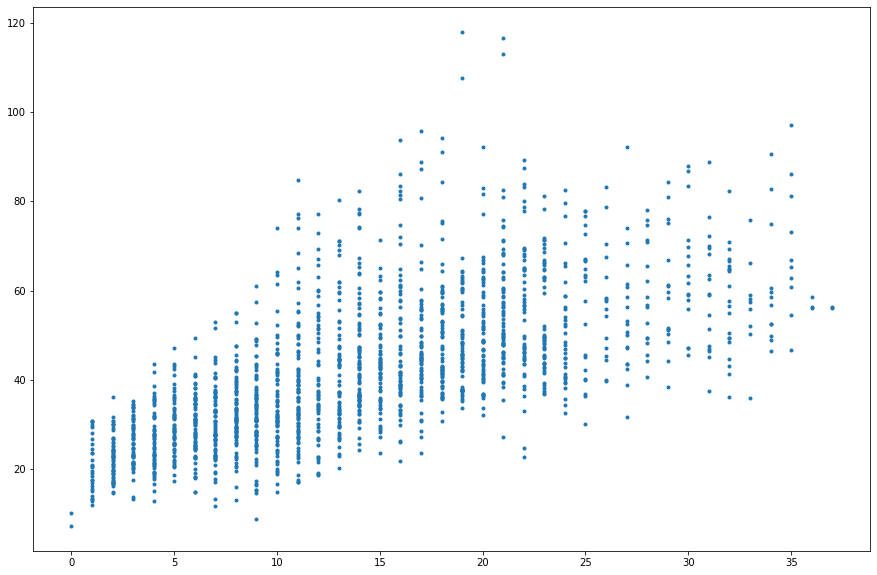

In [46]:
plt.figure(figsize = (15,10))
plt.plot(alpha_diversities['age_months'][1:].astype(int), alpha_diversities['faith_pd'][1:].astype(float), '.', color = )

In [44]:
alpha_diversities['faith_pd'][1:].astype(float)

1       27.713462
2       28.924605
3       36.682776
4       41.448740
5       47.113424
          ...    
1664    24.061489
1665    35.436593
1666    36.520244
1667    81.700999
1668    26.979182
Name: faith_pd, Length: 1668, dtype: float64